In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
db=pd.read_csv('/content/drive/MyDrive/financial risk assessment - financial_risk.csv')
db.head()

,Customer ID,Credit Score,Annual Income,Debt-to-Income Ratio,Total Debt,Loan Amount,Loan Term,Loan Repayment History,Account Balance,Monthly Expenditure,Credit Card Utilization,Default History,Employment Status,Collateral Value,Risk Grade
0,10001,750,120000,0.25,50000,30000,5,on time,10000,5000,0.30,no,employed,20000,low
1,10002,680,90000,0.35,70000,40000,10,late,8000,6000,0.40,yes,self-employed,15000,medium
2,10003,820,180000,0.20,100000,60000,7,on time,12000,7000,0.20,no,unemployed,25000,low
3,10004,740,110000,0.30,80000,50000,8,late,9000,6500,0.35,yes,employed,18000,medium
4,10005,660,80000,0.40,90000,70000,9,on time,11000,7500,0.45,no,self-employed,20000,high


In [ ]:
db.shape

(500, 15)

In [ ]:
db.isnull().sum()

,0
Customer ID,0
Credit Score,0
Annual Income,0
Debt-to-Income Ratio,0
Total Debt,0
Loan Amount,0
Loan Term,0
Loan Repayment History,0
Account Balance,0
Monthly Expenditure,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_features = ['Loan Repayment History', 'Default History', 'Employment Status', 'Risk Grade']
for feature in categorical_features:
    db[feature] = le.fit_transform(db[feature])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numeric_features = ['Credit Score', 'Annual Income','Debt-to-Income Ratio','Total Debt','Loan Amount','Loan Term','Loan Term','Monthly Expenditure','Credit Card Utilization','Collateral Value']
db[numeric_features] = ss.fit_transform(db[numeric_features])


In [ ]:
db.head()

,Customer ID,Credit Score,Annual Income,Debt-to-Income Ratio,Total Debt,Loan Amount,Loan Term,Loan Repayment History,Account Balance,Monthly Expenditure,Credit Card Utilization,Default History,Employment Status,Collateral Value,Risk Grade
0,10001,-0.510926,-0.702438,0.561942,-0.402774,-0.438065,-0.497611,2,10000,-0.641275,-0.662122,2,0,-0.615972,3
1,10002,-1.465163,-0.896139,1.272524,-0.301885,-0.386722,-0.454446,0,8000,-0.520165,-0.655803,6,1,-0.766112,4
2,10003,0.443311,-0.315036,0.206651,-0.150552,-0.284036,-0.480345,2,12000,-0.399056,-0.668442,2,2,-0.465833,3
3,10004,-0.647246,-0.767005,0.917233,-0.251441,-0.335379,-0.471712,0,9000,-0.459610,-0.658963,6,0,-0.676028,4
4,10005,-1.737803,-0.960707,1.627814,-0.200996,-0.232692,-0.463079,2,11000,-0.338501,-0.652643,2,1,-0.615972,2


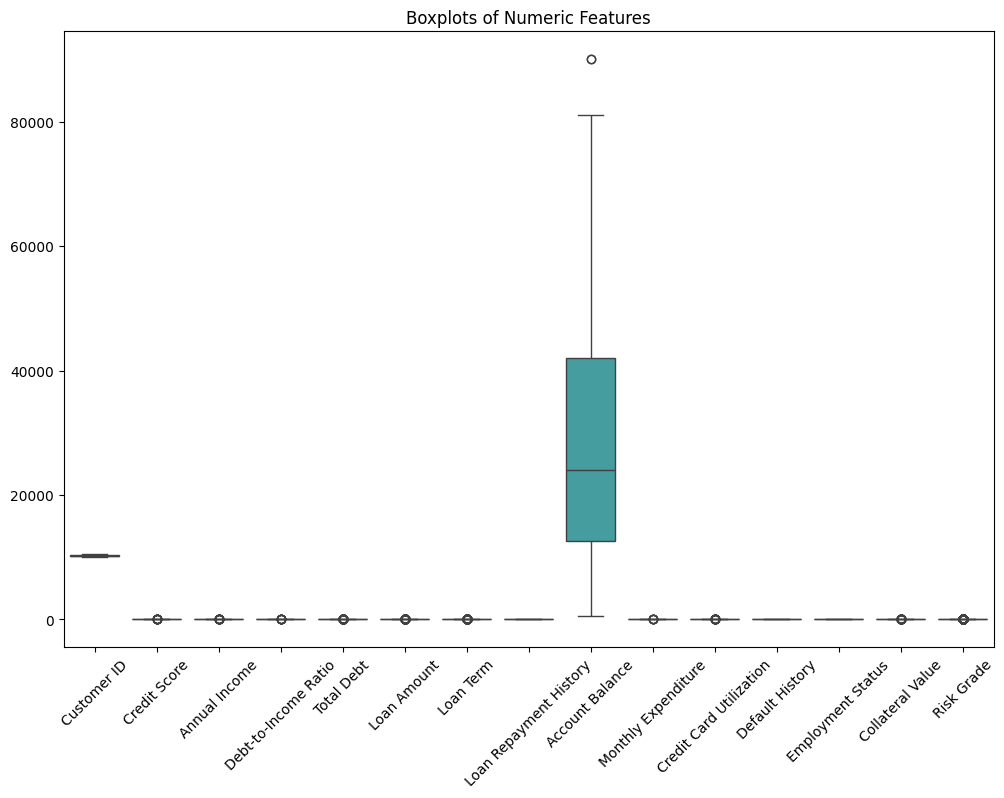

In [ ]:
# prompt: plot boxplot for all numeric values from db datset

import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = db.select_dtypes(include=['number'])

# Create boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()


Customer ID                  0
Credit Score                11
Annual Income               19
Debt-to-Income Ratio         8
Total Debt                  70
Loan Amount                 77
Loan Term                   90
Loan Repayment History       0
Account Balance              2
Monthly Expenditure          5
Credit Card Utilization     25
Default History              0
Employment Status            0
Collateral Value            44
Risk Grade                 245
dtype: int64


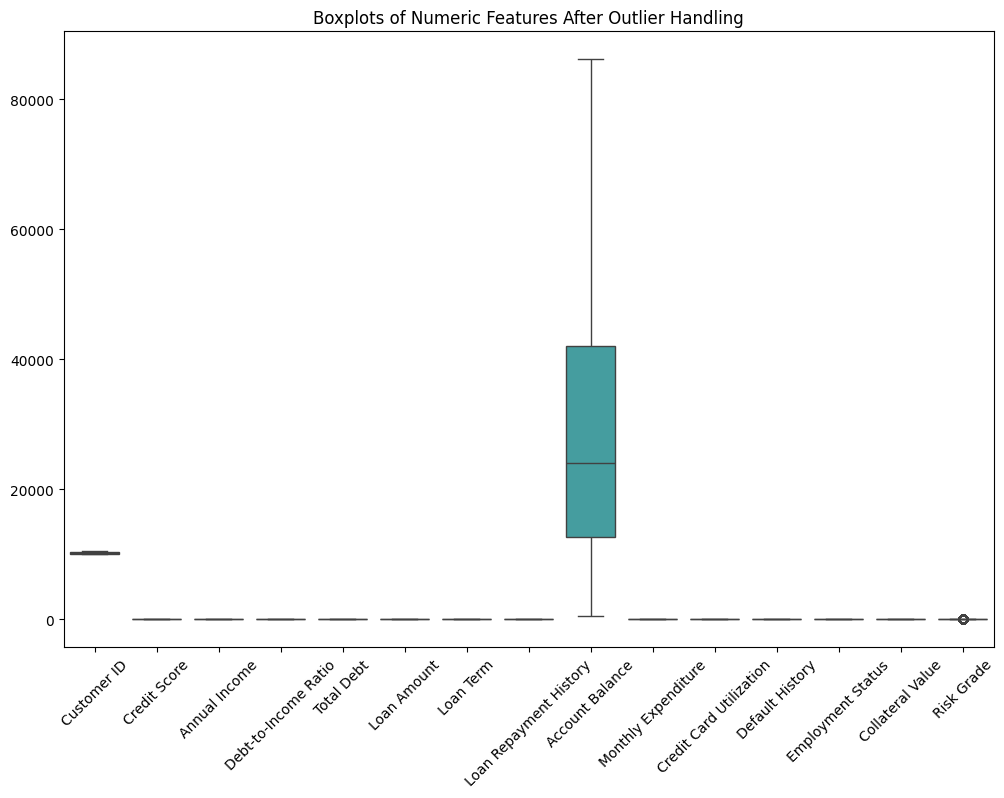

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).sum()
print(outliers)

for column in numeric_columns:
    upper_bound = Q3[column] + 1.5 * IQR[column]
    lower_bound = Q1[column] - 1.5 * IQR[column]
    db[column] = np.clip(db[column], lower_bound, upper_bound)

plt.figure(figsize=(12, 8))
sns.boxplot(data=db[numeric_columns.columns])
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features After Outlier Handling')
plt.show()


In [ ]:
# prompt: provide 5 suitable algorithms for this dataset

# Given that this is a financial risk assessment dataset,
# we're likely dealing with a classification problem (predicting risk grade).
# Here are 5 suitable algorithms:

# 1. Logistic Regression: A classic and interpretable algorithm for binary and
#    multiclass classification problems.
# 2. Decision Trees: Can capture non-linear relationships and provide insights
#    into feature importance.
# 3. Random Forest: An ensemble method that builds multiple decision trees and
#    combines their predictions for improved accuracy and robustness.
# 4. Gradient Boosting (e.g., XGBoost, LightGBM): Another powerful ensemble
#    method that often achieves state-of-the-art results.
# 5. Support Vector Machines (SVM): Effective for both linear and non-linear
#    classification problems, especially in high-dimensional spaces.


In [ ]:
db.head()

,Customer ID,Credit Score,Annual Income,Debt-to-Income Ratio,Total Debt,Loan Amount,Loan Term,Loan Repayment History,Account Balance,Monthly Expenditure,Credit Card Utilization,Default History,Employment Status,Collateral Value,Risk Grade
0,10001,-0.510926,-0.702438,0.561942,-0.402774,-0.438065,-0.497611,2,10000,-0.641275,-0.662122,2,0,-0.615972,3
1,10002,-1.465163,-0.896139,1.272524,-0.301885,-0.386722,-0.454446,0,8000,-0.520165,-0.655803,6,1,-0.766112,4
2,10003,0.443311,-0.315036,0.206651,-0.150552,-0.284036,-0.480345,2,12000,-0.399056,-0.668442,2,2,-0.465833,3
3,10004,-0.647246,-0.767005,0.917233,-0.251441,-0.335379,-0.471712,0,9000,-0.459610,-0.658963,6,0,-0.676028,4
4,10005,-1.737803,-0.960707,1.627814,-0.200996,-0.232692,-0.463079,2,11000,-0.338501,-0.652643,2,1,-0.615972,2


In [ ]:
# prompt: logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve

# Assuming 'Risk Grade' is the target variable and needs to be converted to categorical
# Adjust the binning strategy as per your dataset
# db['Risk Category'] = pd.cut(db['Risk Grade'], bins=[0, 2, 3, 4, 5], labels=['Low', 'Medium', 'High', 'Very High'])

X = db.drop(['Risk Grade'], axis=1)  # Drop both the original and the new categorical column
y = db['Risk Grade']  # Use the new categorical target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00        13
           3       0.88      0.88      0.88        51
           4       0.63      0.92      0.75        24

    accuracy                           0.78       100
   macro avg       0.66      0.72      0.69       100
weighted avg       0.71      0.78      0.74       100


Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  4  1  0  0]
 [ 0  0  0  5  8]
 [ 0  0  1 45  5]
 [ 0  1  0  1 22]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      0.85      0.92        13
           3       0.98      0.92      0.95        51
           4       0.83      1.00      0.91        24

    accuracy                           0.94       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.94      0.94       100


Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 11  1  1]
 [ 0  0  0 47  4]
 [ 0  0  0  0 24]]


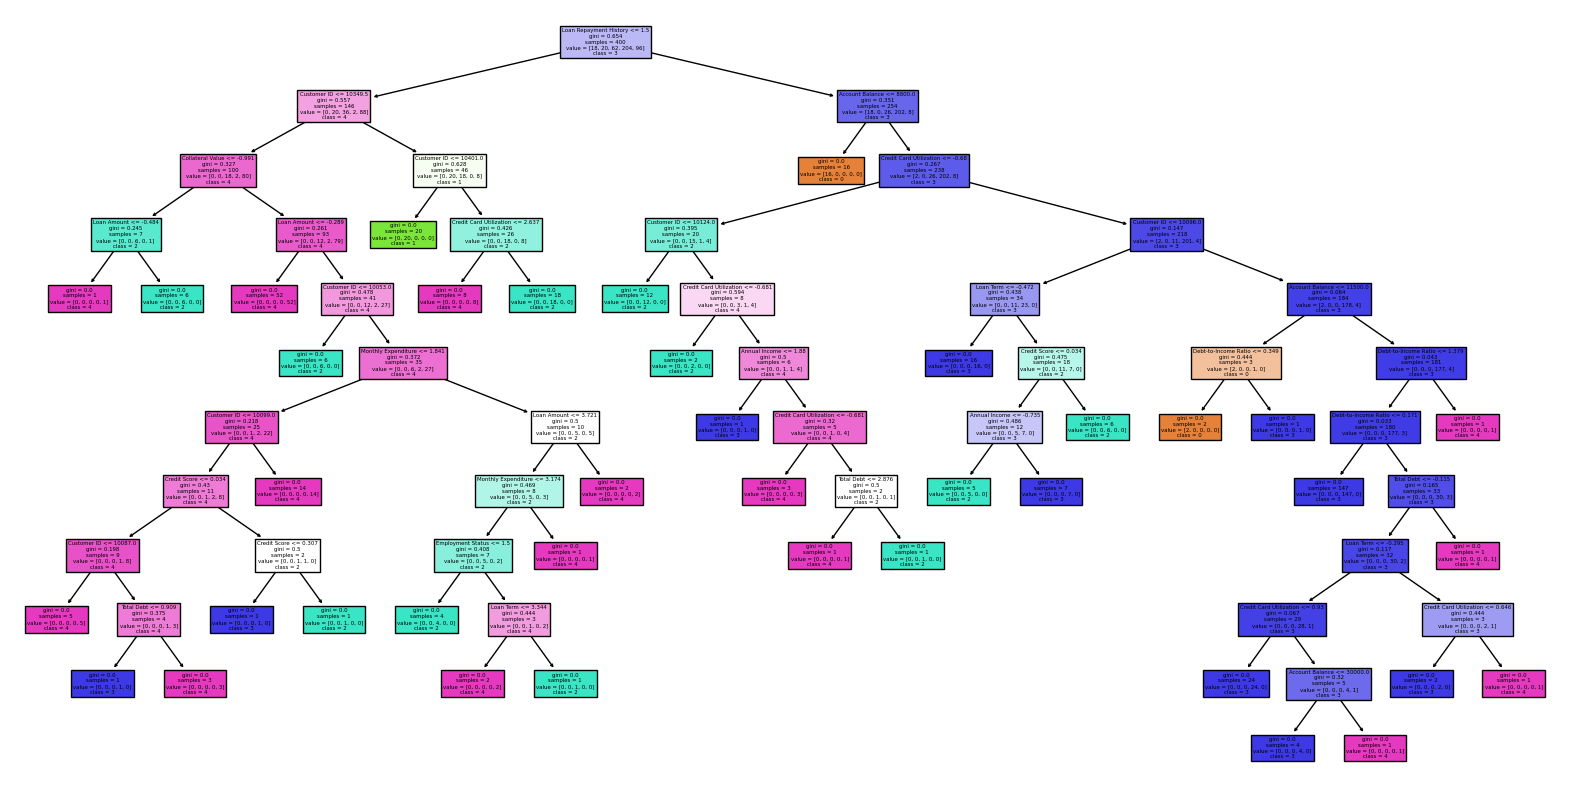

In [ ]:
# prompt: decision tree for the baove dataset to determine risk score and plot graph

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Make sure 'Risk Grade' is the target variable and it's numerical
X = db.drop('Risk Grade', axis=1)
y = db['Risk Grade'] # Use the numerical 'Risk Grade' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting the Decision Tree (might need to adjust figure size)
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_.astype(str), filled=True)
plt.show()

Accuracy (Visualization Subset): 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


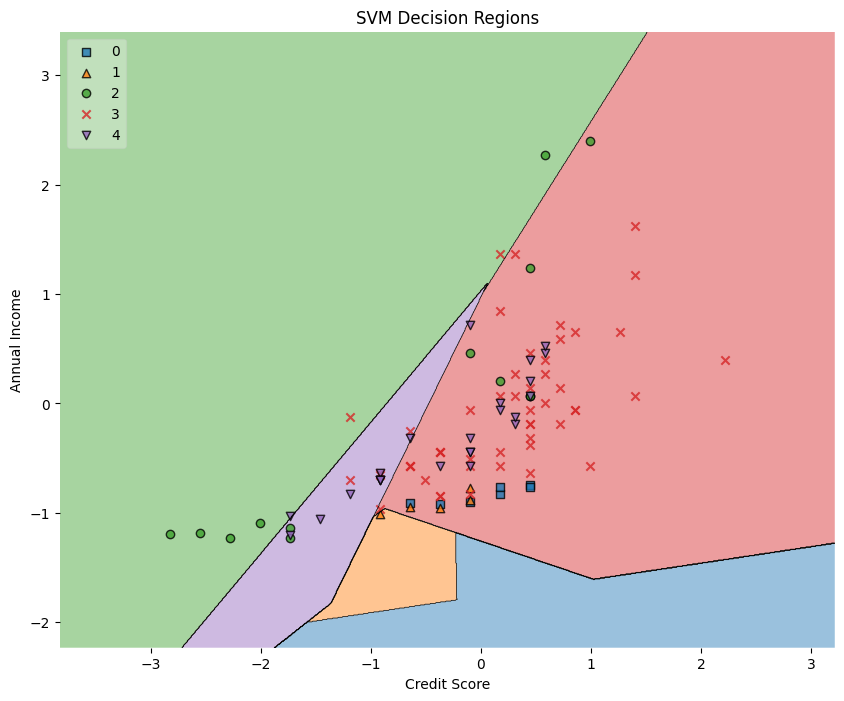

In [ ]:
# prompt: support vector machine algorithm for the above dataset db with plotting graph with hyperplane

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Assuming 'Risk Grade' is the target variable and it's numerical
X = db.drop('Risk Grade', axis=1)
y = db['Risk Grade']

# For visualization purposes, let's select only two features (you can change these)
X_vis = X[['Credit Score', 'Annual Income']]

# Split the data (using the visualization subset for plotting)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

# Create SVM classifier
svm_model = SVC(kernel='linear')  # You can experiment with different kernels
svm_model.fit(X_train_vis, y_train_vis)

# Predictions (using the visualization subset)
y_pred_vis = svm_model.predict(X_test_vis)

# Evaluation (using the visualization subset)
print("Accuracy (Visualization Subset):", accuracy_score(y_test_vis, y_pred_vis))

# Plotting the decision regions (using the visualization subset)
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test_vis.values, y_test_vis.values, clf=svm_model, legend=2)
plt.xlabel(X_vis.columns[0])
plt.ylabel(X_vis.columns[1])
plt.title('SVM Decision Regions')
plt.show()


The colored regions represent different risk grades predicted by the SVM model. Each color corresponds to one of the five risk grades (0 to 4).

risk grade 0-green
risk grade 1-orange
risk grade 2-blue
risk grade 3-red
risk grade 4-purple

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        13
           3       1.00      0.90      0.95        51
           4       0.83      1.00      0.91        24

    accuracy                           0.95       100
   macro avg       0.97      0.98      0.97       100
weighted avg       0.96      0.95      0.95       100


Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0 46  5]
 [ 0  0  0  0 24]]


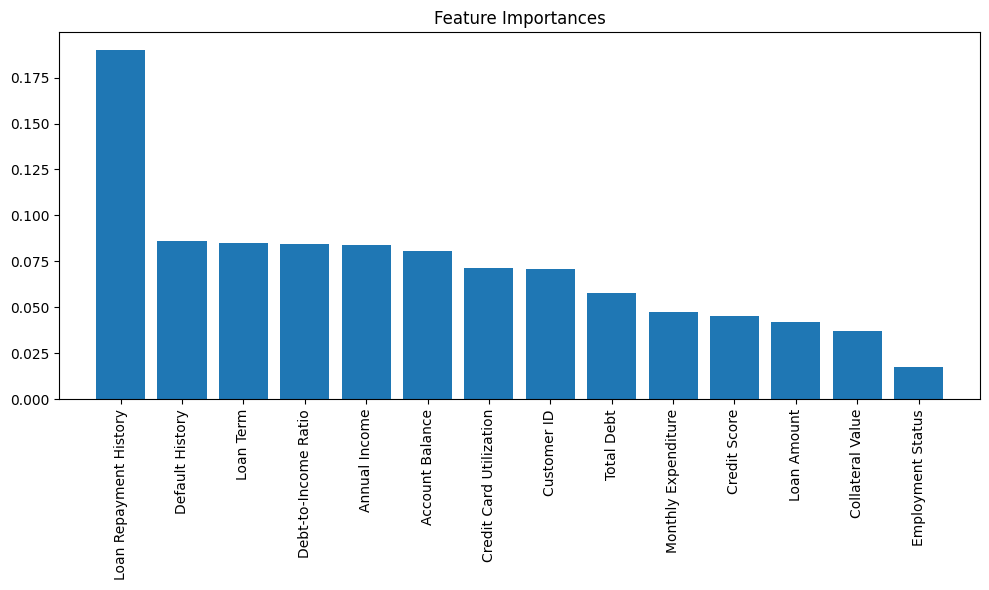

In [ ]:
# prompt: code for random forest algorithm with plot

import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming 'Risk Grade' is the target variable and it's numerical
X = db.drop('Risk Grade', axis=1)
y = db['Risk Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.62      1.00      0.77         5
           2       0.92      0.92      0.92        13
           3       0.96      0.92      0.94        51
           4       0.87      0.83      0.85        24

    accuracy                           0.91       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.92      0.91      0.91       100


Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 12  1  0]
 [ 0  0  1 47  3]
 [ 0  3  0  1 20]]


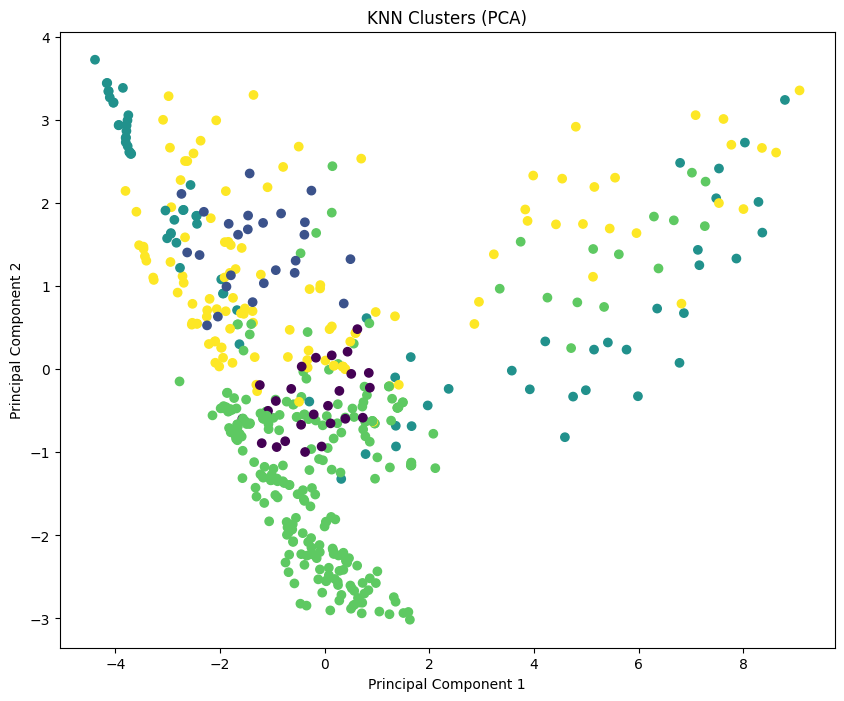

In [ ]:
# prompt: KNN clustring for above datsset with plotted clusters

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Assuming 'Risk Grade' is the target variable and it's numerical
X = db.drop('Risk Grade', axis=1)
y = db['Risk Grade']

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create KNN classifier (you can adjust n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# For visualization, let's use PCA to reduce dimensions to 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('KNN Clusters (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


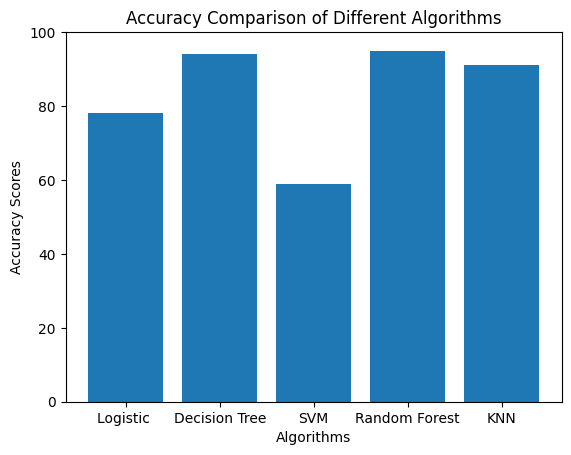

In [ ]:
# prompt: plot a bar graph with all 5 algoorithms accuracy logitic-78, decision tree-94, svm-59, random frest - 95, knn-91

import matplotlib.pyplot as plt

# Data for the bar graph
algorithms = ['Logistic ', 'Decision Tree', 'SVM', 'Random Forest', 'KNN']
accuracy_scores = [78, 94, 59, 95, 91]

# Create the bar graph
plt.bar(algorithms, accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim([0, 100])  # Set y-axis limits for better visualization
plt.show()
